In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'diabetic_data.csv'))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
medicine_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

In [5]:
def display_all(data):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(data)

ids_mapping = os.path.join(os.getcwd(), 'data', 'IDs_mapping.csv')

with open(ids_mapping, 'r') as file:
    lines = file.readlines()

# Identify the indices where the lines contain only a comma
split_indices = [i for i, line in enumerate(lines) if line.strip() == ',']

# Split the list of lines into three parts based on these indices
admission_type_lines = lines[:split_indices[0]]
discharge_disposition_lines = lines[split_indices[0] + 1:split_indices[1]]
admission_source_lines = lines[split_indices[1] + 1:]

# Write each part to a separate CSV file
with open('admission_type_mapping.csv', 'w') as file:
    file.writelines(admission_type_lines)

with open('discharge_disposition_mapping.csv', 'w') as file:
    file.writelines(discharge_disposition_lines)

with open('admission_source_mapping.csv', 'w') as file:
    file.writelines(admission_source_lines)

# Read the three CSV files into DataFrames
admission_type_df = pd.read_csv('admission_type_mapping.csv')
discharge_disposition_df = pd.read_csv('discharge_disposition_mapping.csv')
admission_source_df = pd.read_csv('admission_source_mapping.csv')

# delete the csv files
os.remove('admission_type_mapping.csv')
os.remove('discharge_disposition_mapping.csv')
os.remove('admission_source_mapping.csv')

# Display the DataFrames
display_all(admission_type_df)
display_all(discharge_disposition_df)
display_all(admission_source_df)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


## Data Cleaning ##

In [6]:
from sklearn.pipeline import Pipeline, FunctionTransformer

In [7]:
# Replace all ?s with NaN
def replace_question_marks(df):
    df = df.replace('?', np.nan)
    return df

replace_question_marks_tf = FunctionTransformer(replace_question_marks)

In [8]:
# Pre-process Re-admitted column. If the value is NO, replace it with 0 otherwise replace it with 1. Treat this as a categorical variable.
def preprocess_readmitted(df):
    df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)
    return df

preprocess_readmitted_tf = FunctionTransformer(preprocess_readmitted)

In [9]:
# drop rows with gender "Unknown/Invalid"
def drop_unknown_gender(df):
    df = df.drop(df.loc[df['gender'] == 'Unknown/Invalid'].index, axis=0)
    return df

drop_unknown_gender_tf = FunctionTransformer(drop_unknown_gender)

In [10]:
# pre-process Age column [x-y) -> (x+y)/2
def compute_mean_age(age_str):
    x, y = age_str[1:-1].split('-')
    x = int(x)
    y = int(y)
    mean_age = (x + y) / 2
    return mean_age

def preprocess_age(df):
    df['age'] = df['age'].apply(compute_mean_age)
    return df

preprocess_age_tf = FunctionTransformer(preprocess_age)

In [11]:
# drop the weight column as it is many missing values
def drop_weight_column(df):
    df = df.drop('weight', axis=1)
    return df

drop_weight_column_tf = FunctionTransformer(drop_weight_column)

In [12]:
# remove all rows when the patient expired or went into hospice
def remove_expired_or_hospice_patients(df):
    df = df.drop(df.loc[df['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])].index, axis=0)
    return df

remove_expired_or_hospice_patients_tf = FunctionTransformer(remove_expired_or_hospice_patients)

In [13]:
# remove all rows with duplicate patient_nbr, keeping the first occurrence
def remove_duplicate_patients(df):
    df = df.drop_duplicates(subset='patient_nbr', keep='first')
    return df

remove_duplicate_patients_tf = FunctionTransformer(remove_duplicate_patients)

In [14]:
# drop payer_code and encounter_id columns
def drop_payer_code_and_encounter_id(df):
    df = df.drop(['payer_code', 'encounter_id'], axis=1)
    return df

drop_payer_code_and_encounter_id_tf = FunctionTransformer(drop_payer_code_and_encounter_id)

In [15]:
import re

diag_list = ['diag_1','diag_2','diag_3']

def transform_value(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transform_category(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

def preprocess_diag_column(df):
    for col in diag_list:
        df[col].fillna('NaN', inplace=True)
    for col in diag_list:
        df[col] = df[col].apply(transform_value)
        df[col] = df[col].astype(float)
    for col in diag_list:
        df[col] = df[col].apply(transform_category)
    return df

preprocess_diag_column_tf = FunctionTransformer(preprocess_diag_column)

In [16]:
# Drop all medicines from the dataframe where the frequency of a value is more than 95% of the total number of rows
def get_medicine_columns_to_drop(df):
    threshold = 0.95 * len(df)
    columns_to_drop = []
    for column in df.columns:
        if df[column].value_counts().max() > threshold:
            columns_to_drop.append(column)
    return columns_to_drop

medicine_column_to_drop = get_medicine_columns_to_drop(df)

def drop_medicine_columns(df):
    columns_to_drop = get_medicine_columns_to_drop(df)
    print(f'The columns to drop are: {medicine_column_to_drop}')
    df = df.drop(columns=columns_to_drop)
    return df

drop_medicine_columns_tf = FunctionTransformer(drop_medicine_columns)

In [17]:
remaining_medicine_columns = [col for col in medicine_columns if col not in medicine_column_to_drop]

def drop_diabetes_med_column(df):
    filtered_df = df[df['diabetesMed'] == 'No']
    result_df = filtered_df[filtered_df[remaining_medicine_columns].eq('Yes').any(axis=1)]
    if len(result_df) == 0:
        df = df.drop('diabetesMed', axis=1)
    return df

drop_diabetes_med_column_tf = FunctionTransformer(drop_diabetes_med_column)

In [18]:
# drop the patient_nbr column
def drop_patient_nbr(df):
    df = df.drop('patient_nbr', axis=1)
    return df

drop_patient_nbr_tf = FunctionTransformer(drop_patient_nbr)

In [20]:
data_cleaner_pipeline = Pipeline(steps = [
    ('replace_question_marks', replace_question_marks_tf),
    ('preprocess_readmitted', preprocess_readmitted_tf),
    ('drop_unknown_gender', drop_unknown_gender_tf),
    ('preprocess_age', preprocess_age_tf),
    ('drop_weight_column', drop_weight_column_tf),
    ('remove_expired_or_hospice_patients', remove_expired_or_hospice_patients_tf),
    ('remove_duplicate_patients', remove_duplicate_patients_tf),
    ('drop_payer_code_and_encounter_id', drop_payer_code_and_encounter_id_tf),
    ('preprocess_diag_column', preprocess_diag_column_tf),
    ('drop_medicine_columns', drop_medicine_columns_tf),
    ('drop_diabetes_med_column', drop_diabetes_med_column_tf),
    ('drop_patient_nbr', drop_patient_nbr_tf)])

df = data_cleaner_pipeline.fit_transform(df)

C:\Users\ic019797\AppData\Local\Temp\ipykernel_38192\51135552.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('NaN', inplace=True)


The columns to drop are: ['weight', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [42]:
# data frame after initial data cleaning
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,A1Cresult,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,readmitted
0,Caucasian,Female,5.0,6,25,1,1,Pediatrics-Endocrinology,41,0,...,NaN,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,15.0,1,1,7,3,NaN,59,0,...,NaN,No,No,No,No,No,No,Up,Ch,1
2,AfricanAmerican,Female,25.0,1,1,7,2,NaN,11,5,...,NaN,No,No,Steady,No,No,No,No,No,0
3,Caucasian,Male,35.0,1,1,7,2,NaN,44,1,...,NaN,No,No,No,No,No,No,Up,Ch,0
4,Caucasian,Male,45.0,1,1,7,1,NaN,51,0,...,NaN,No,No,Steady,No,No,No,Steady,Ch,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69987 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      68070 non-null  object 
 1   gender                    69987 non-null  object 
 2   age                       69987 non-null  float64
 3   admission_type_id         69987 non-null  int64  
 4   discharge_disposition_id  69987 non-null  int64  
 5   admission_source_id       69987 non-null  int64  
 6   time_in_hospital          69987 non-null  int64  
 7   medical_specialty         36335 non-null  object 
 8   num_lab_procedures        69987 non-null  int64  
 9   num_procedures            69987 non-null  int64  
 10  num_medications           69987 non-null  int64  
 11  number_outpatient         69987 non-null  int64  
 12  number_emergency          69987 non-null  int64  
 13  number_inpatient          69987 non-null  int64  
 14  diag_1    

# Visualizations

### Readmissions to Number of patients ###

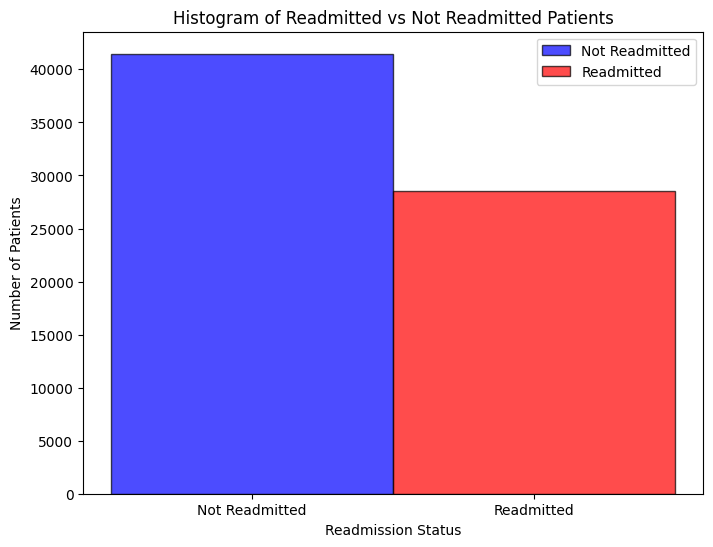

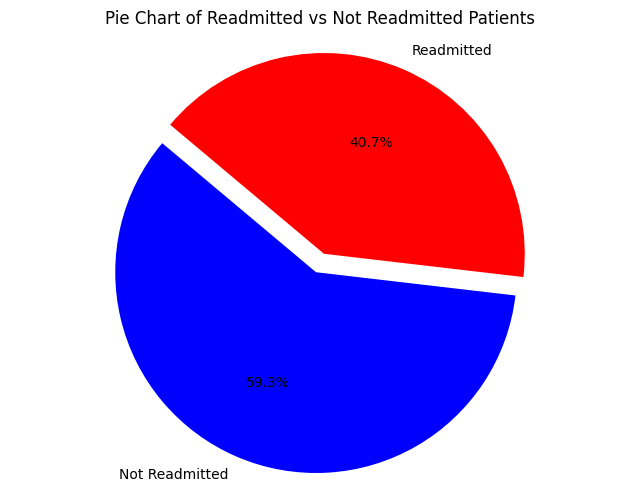

In [21]:
not_readmitted = df[df['readmitted'] == 0]
readmitted = df[df['readmitted'] == 1]

plt.figure(figsize=(8, 6))
plt.hist(not_readmitted['readmitted'], bins=1, edgecolor='black', alpha=0.7, color='blue', label='Not Readmitted')
plt.hist(readmitted['readmitted'], bins=1, edgecolor='black', alpha=0.7, color='red', label='Readmitted')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.xlabel('Readmission Status')
plt.ylabel('Number of Patients')
plt.title('Histogram of Readmitted vs Not Readmitted Patients')
plt.legend()
plt.show()

not_readmitted_count = df[df['readmitted'] == 0].shape[0]
readmitted_count = df[df['readmitted'] == 1].shape[0]
labels = ['Not Readmitted', 'Readmitted']
sizes = [not_readmitted_count, readmitted_count]
colors = ['blue', 'red']
explode = (0.1, 0)  # explode the 1st slice (Not Readmitted)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Pie Chart of Readmitted vs Not Readmitted Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [22]:
def plot_bar_chart(df, column, xlabel):
    filtered_df = df.groupby([column, 'readmitted']).size().unstack(fill_value=0)
    filtered_df.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
    plt.xlabel(xlabel)
    plt.ylabel('Number of Patients')
    plt.title(f'Bar Chart of Readmitted vs Not Readmitted Patients by {xlabel}')
    plt.legend(['Not Readmitted', 'Readmitted'])
    plt.show()

## Readmissions based on Age ##

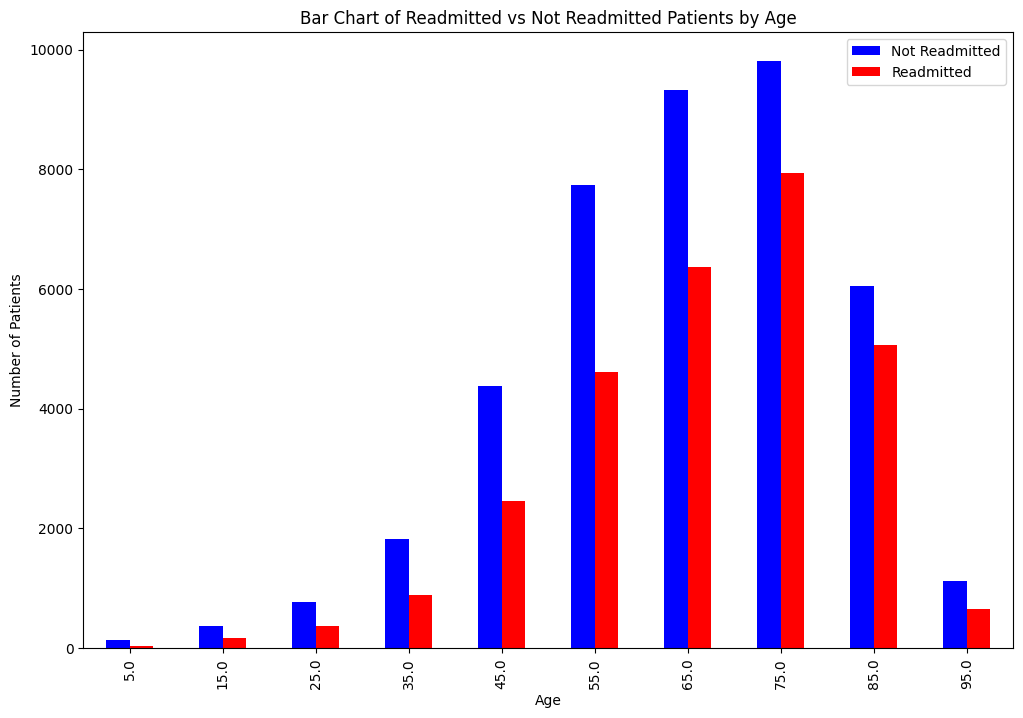

In [23]:
plot_bar_chart(df, 'age', 'Age')

## Re-admissions based on Discharge Disposition ID ##

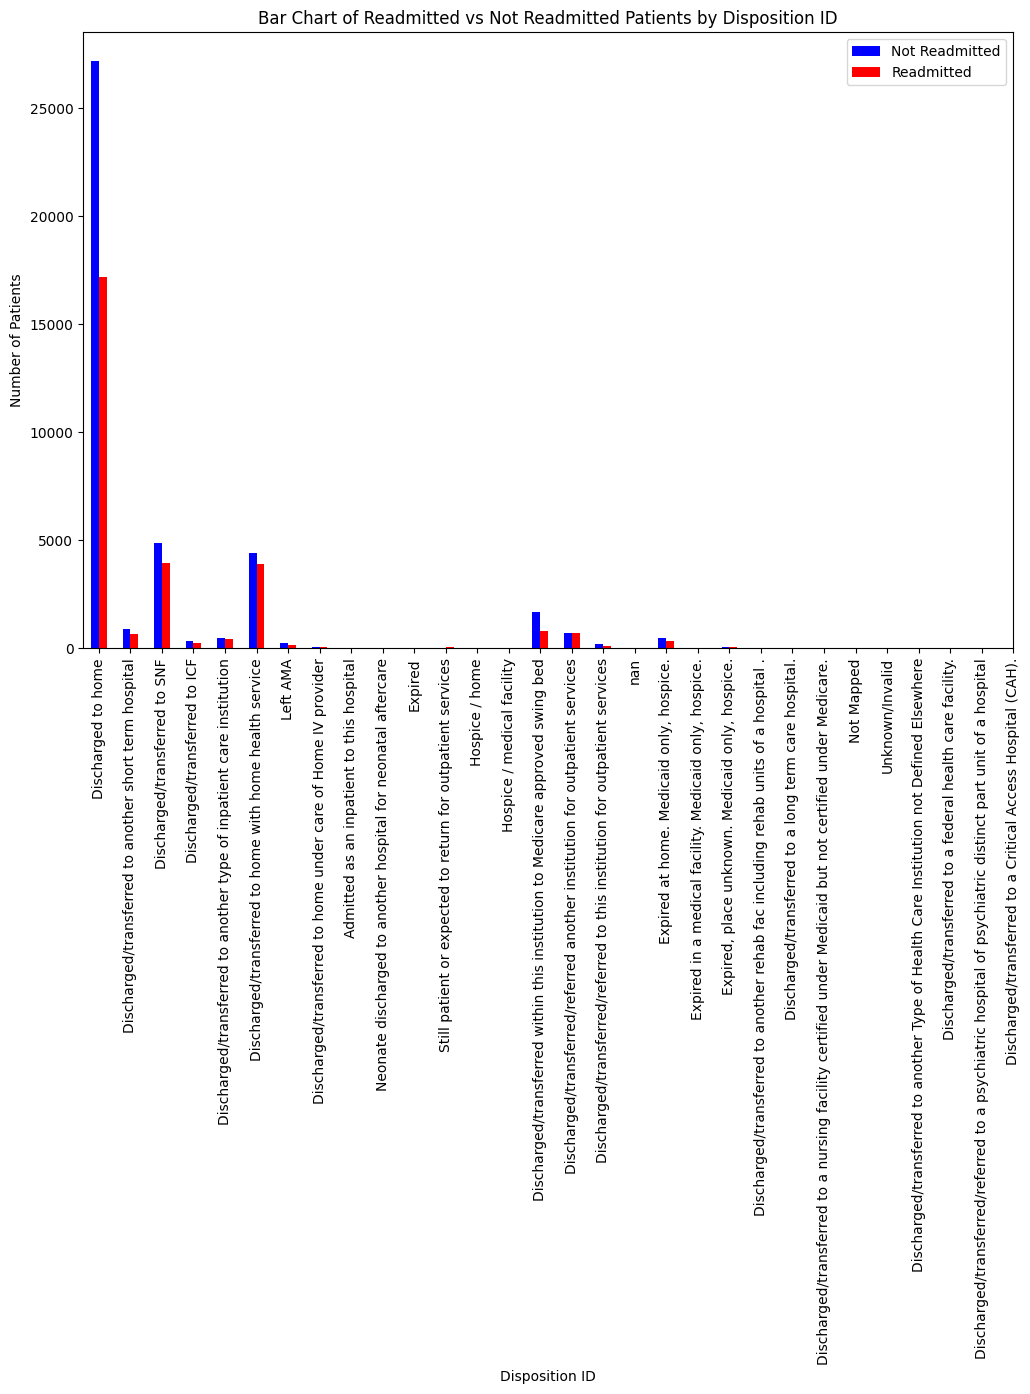

In [24]:
# Plot count of patients with readmissions vs disposition id
disposition_readmitted_counts = df.groupby(['discharge_disposition_id', 'readmitted']).size().unstack(fill_value=0)
# remove all the disposition ids that have zero counts for both readmitted and not readmitted patients
disposition_readmitted_counts = disposition_readmitted_counts.loc[(disposition_readmitted_counts != 0).any(axis=1)]

disposition_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
# before plotting, we need to replace the disposition id with the actual description
disposition_id_mapping = discharge_disposition_df.set_index('discharge_disposition_id').to_dict()['description']
plt.xticks(range(len(disposition_id_mapping)), disposition_id_mapping.values(), rotation=90)
plt.xlabel('Disposition ID')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Disposition ID')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on Race ##

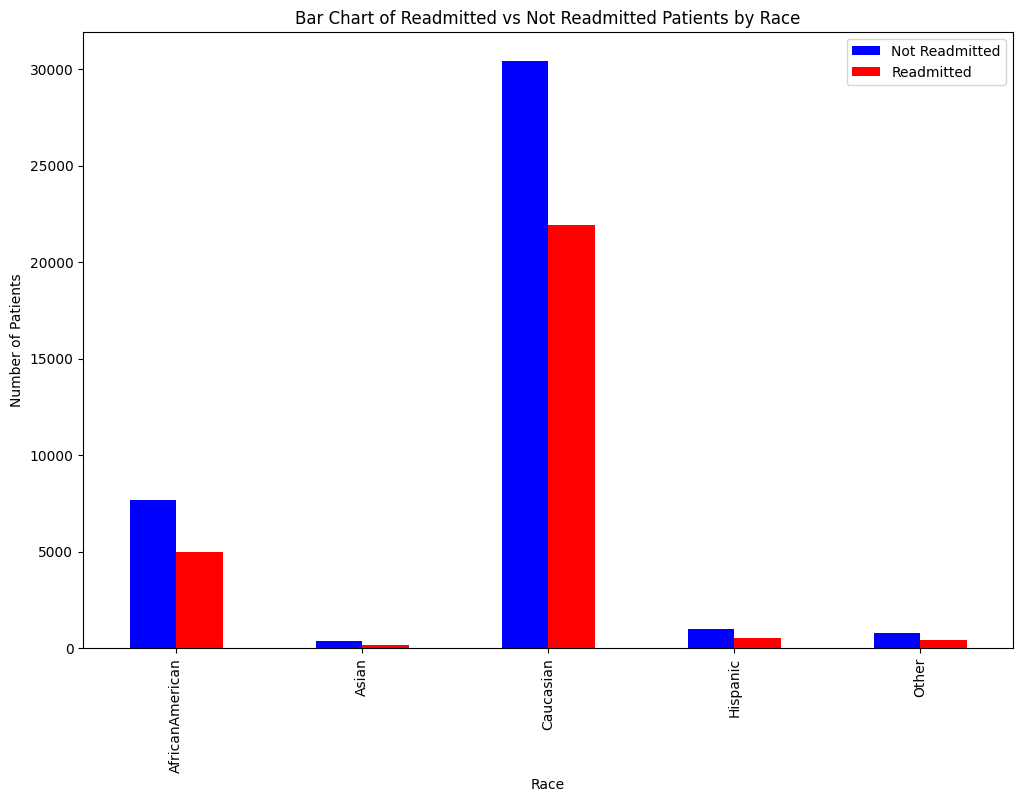

In [25]:
# plot readmission counts vs race
plot_bar_chart(df, 'race', 'Race')

## Re-admissions based on Gender ##

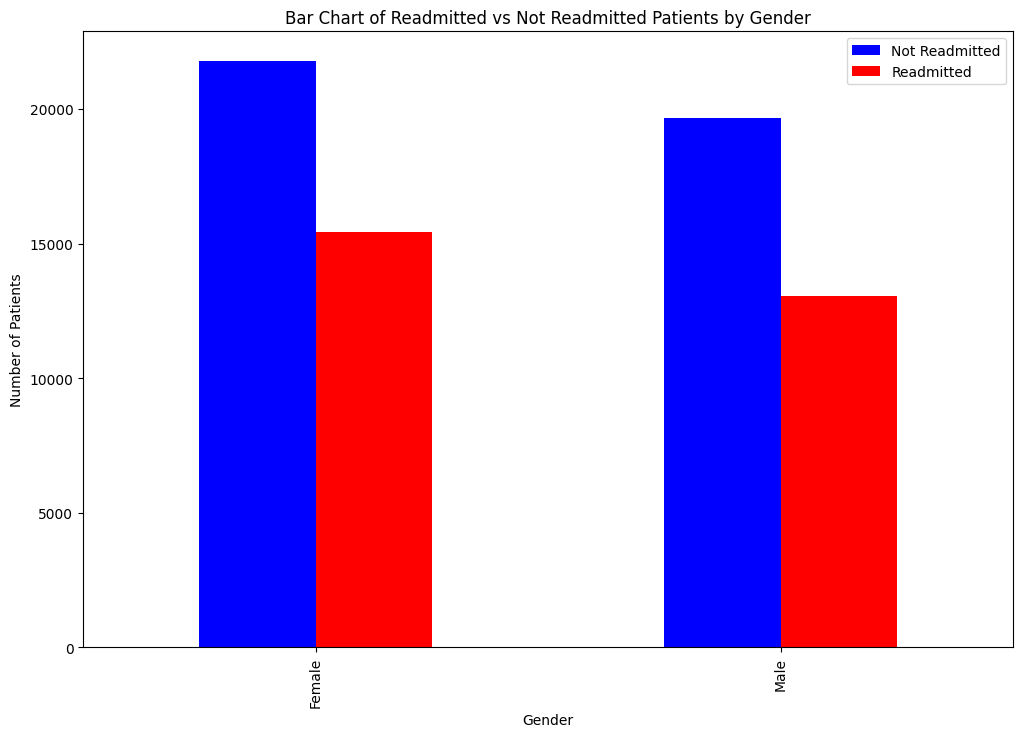

In [26]:
# plot readmission counts vs gender
plot_bar_chart(df, 'gender', 'Gender')

## Re-admissions based on Number of Procedures ##

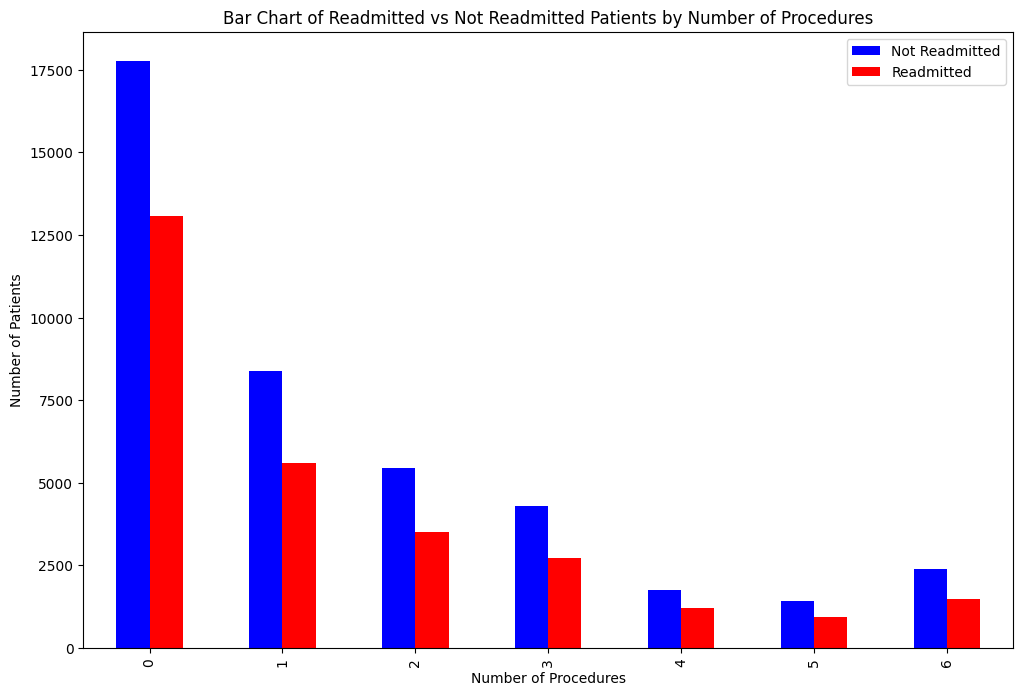

In [27]:
# plot readmission counts vs number of procedures
plot_bar_chart(df, 'num_procedures', 'Number of Procedures')

## Re-admissions based on number of medications ##

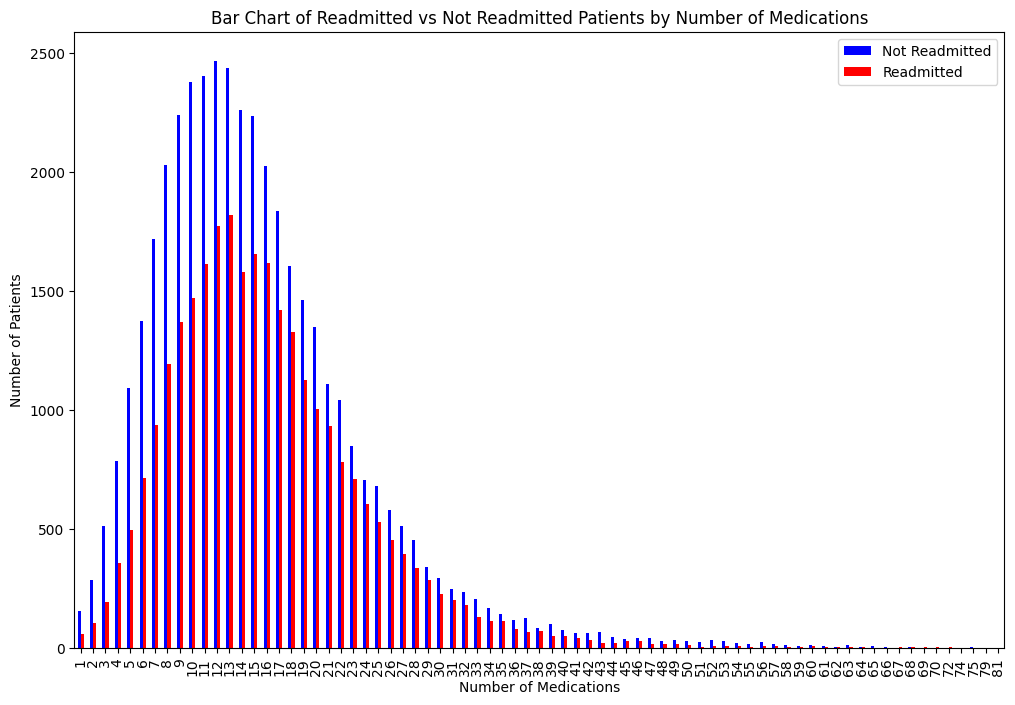

In [28]:
# plot readmission counts vs number of medications
plot_bar_chart(df, 'num_medications', 'Number of Medications')

## Re-admissions based on Number of Outpatients ##

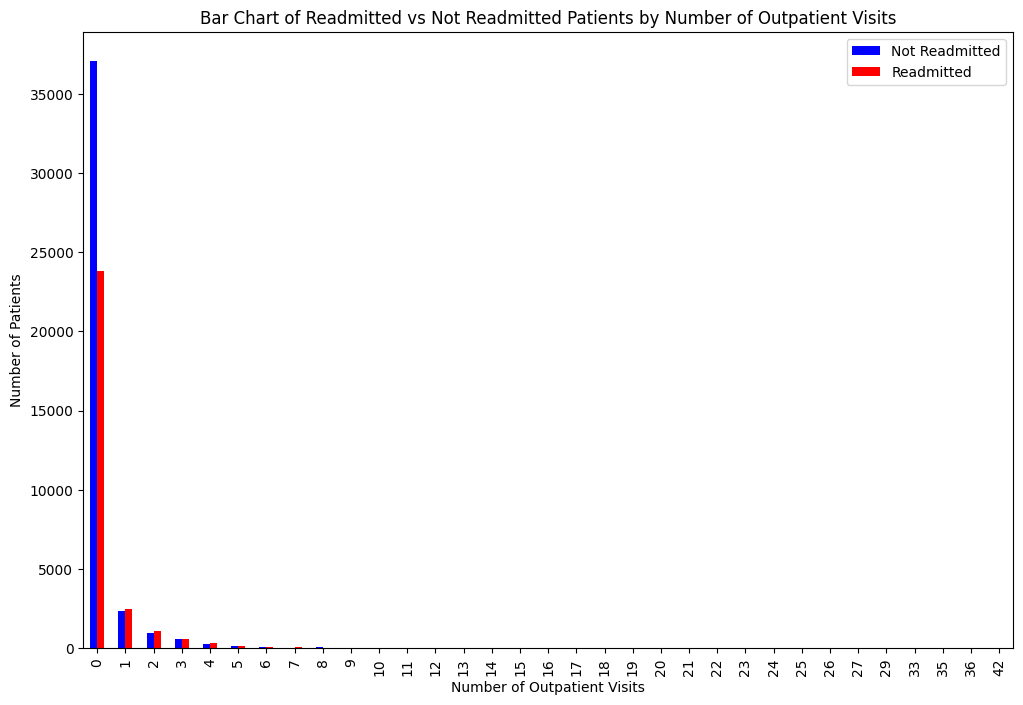

In [29]:
# plot readmission counts vs number of outpatient visits
plot_bar_chart(df, 'number_outpatient', 'Number of Outpatient Visits')

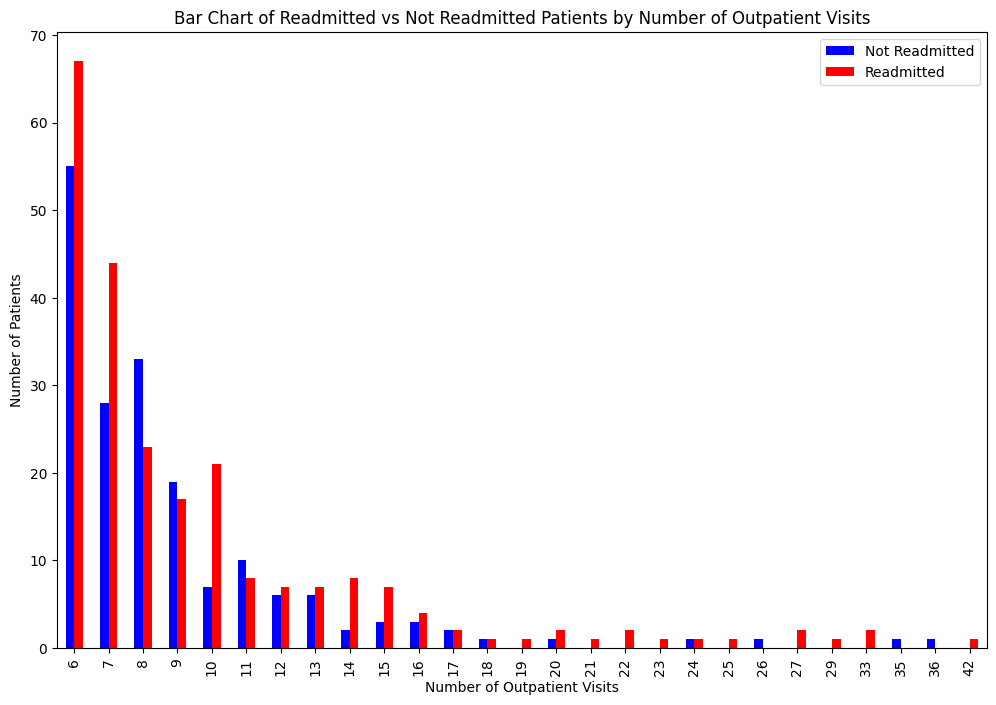

In [30]:
plot_bar_chart(df[df['number_outpatient'] > 5], 'number_outpatient', 'Number of Outpatient Visits')

## Re-admissions based on Number of Inpatients ##

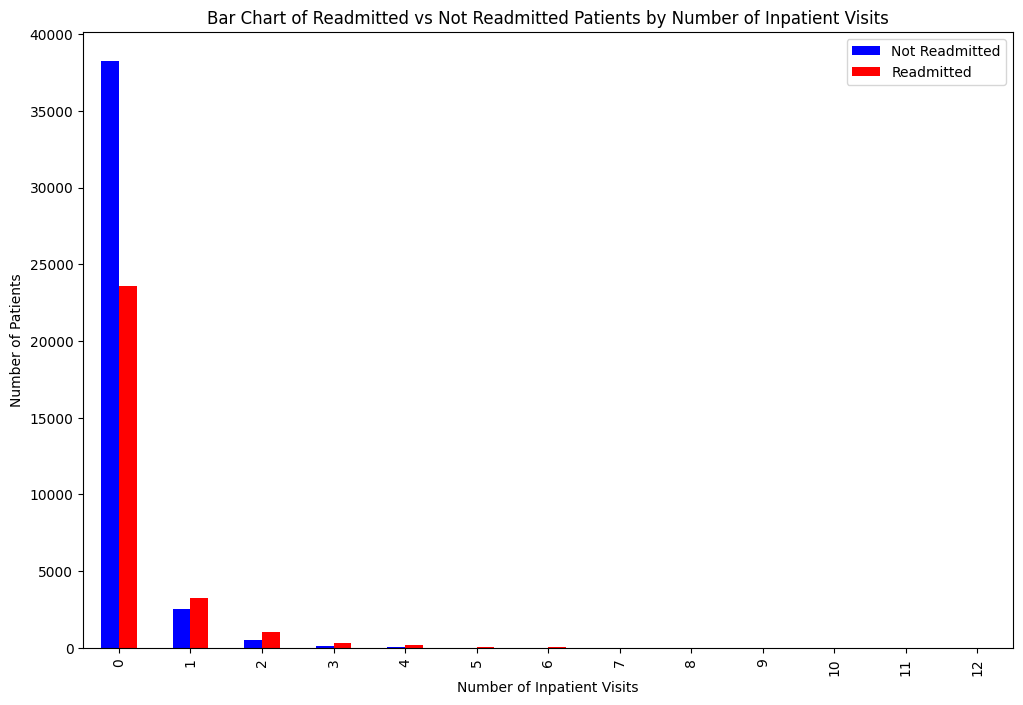

In [31]:
# plot readmission counts vs number of inpatient visits
plot_bar_chart(df, 'number_inpatient', 'Number of Inpatient Visits')

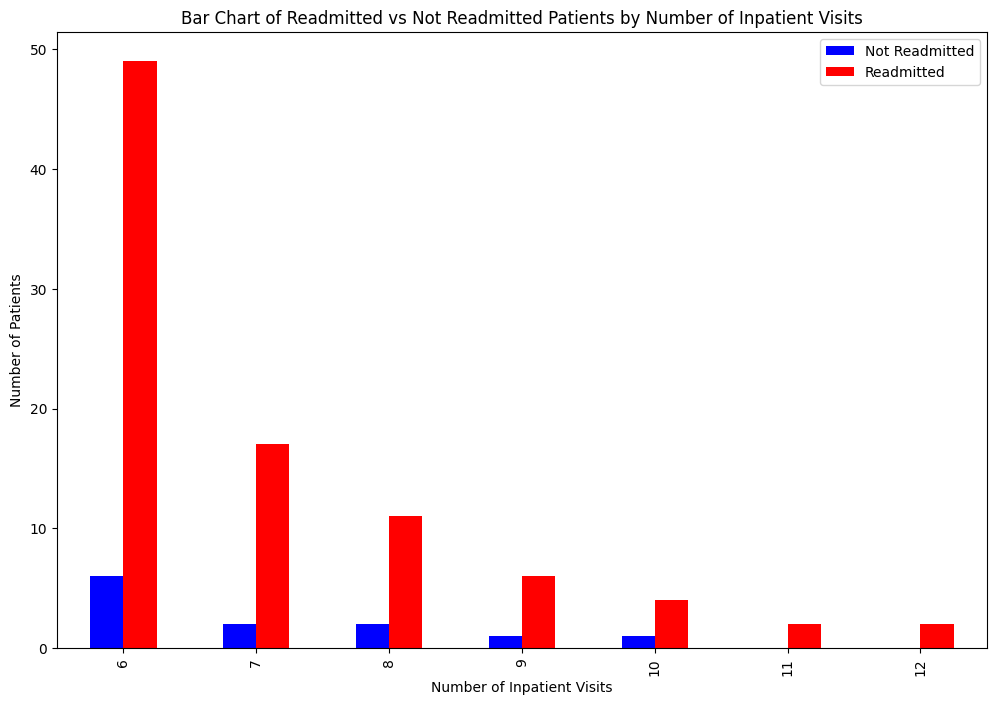

In [32]:
plot_bar_chart(df[df['number_inpatient'] > 5], 'number_inpatient', 'Number of Inpatient Visits')

# Re-admissions based on Number of lab procedures

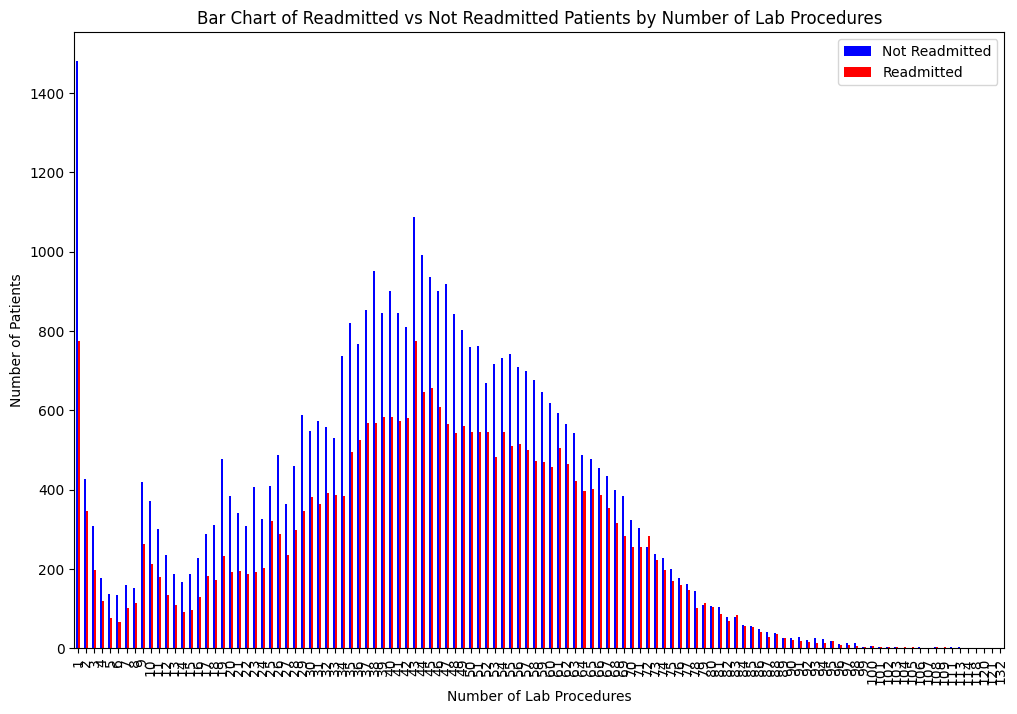

In [33]:
# plot readmission counts vs number of lab procedures
plot_bar_chart(df, 'num_lab_procedures', 'Number of Lab Procedures')

## Re-admissions based on diagnosis ##

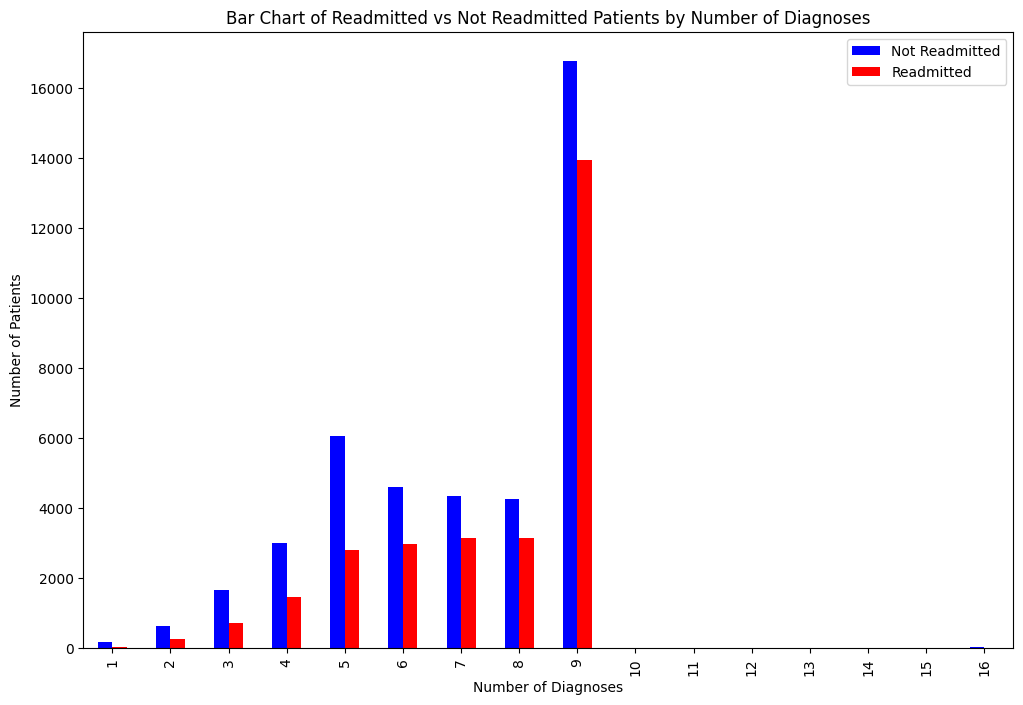

In [34]:
# plot readmission counts vs number of diagnoses
plot_bar_chart(df, 'number_diagnoses', 'Number of Diagnoses')

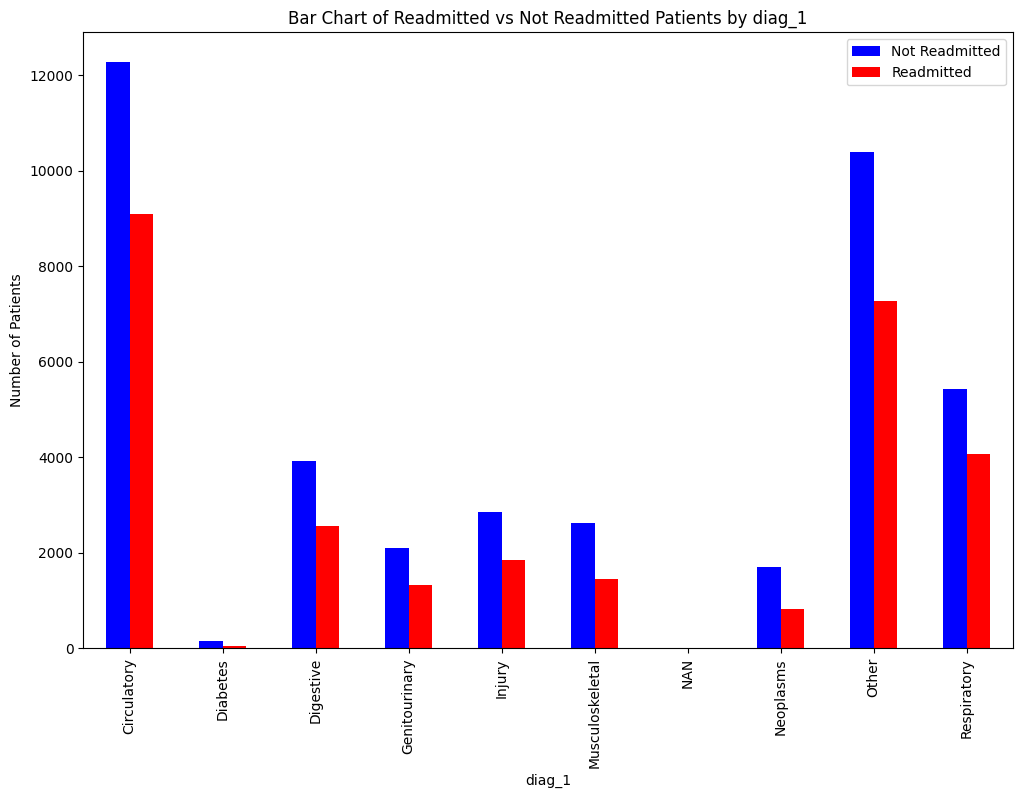

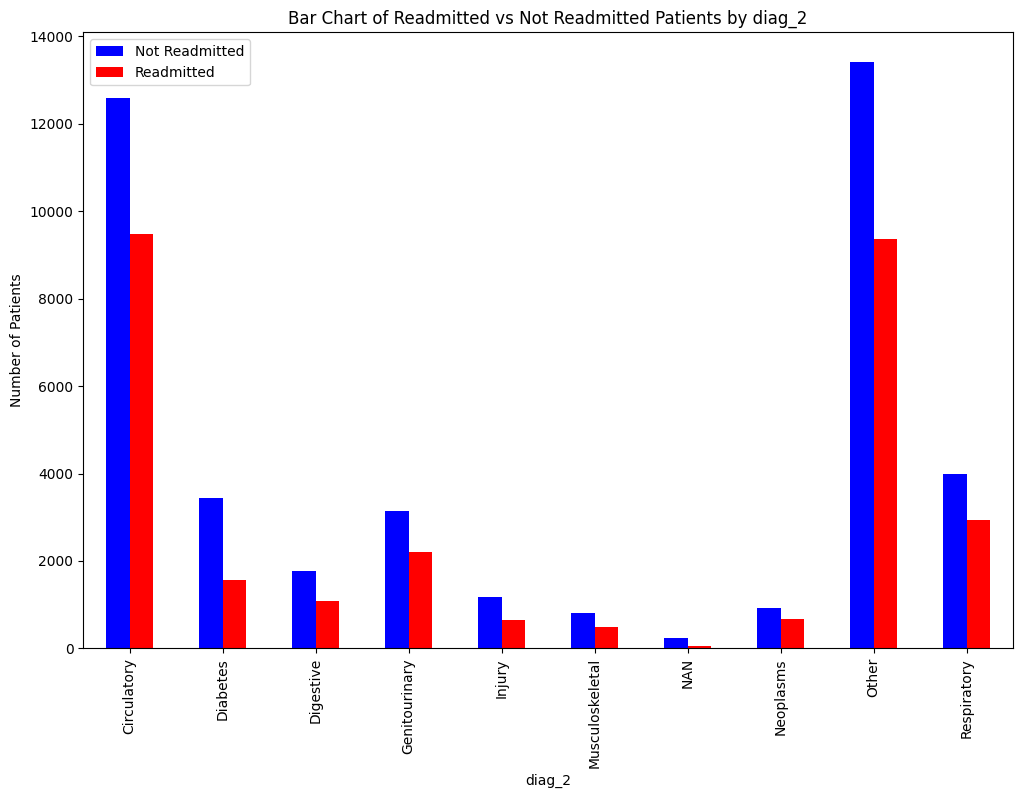

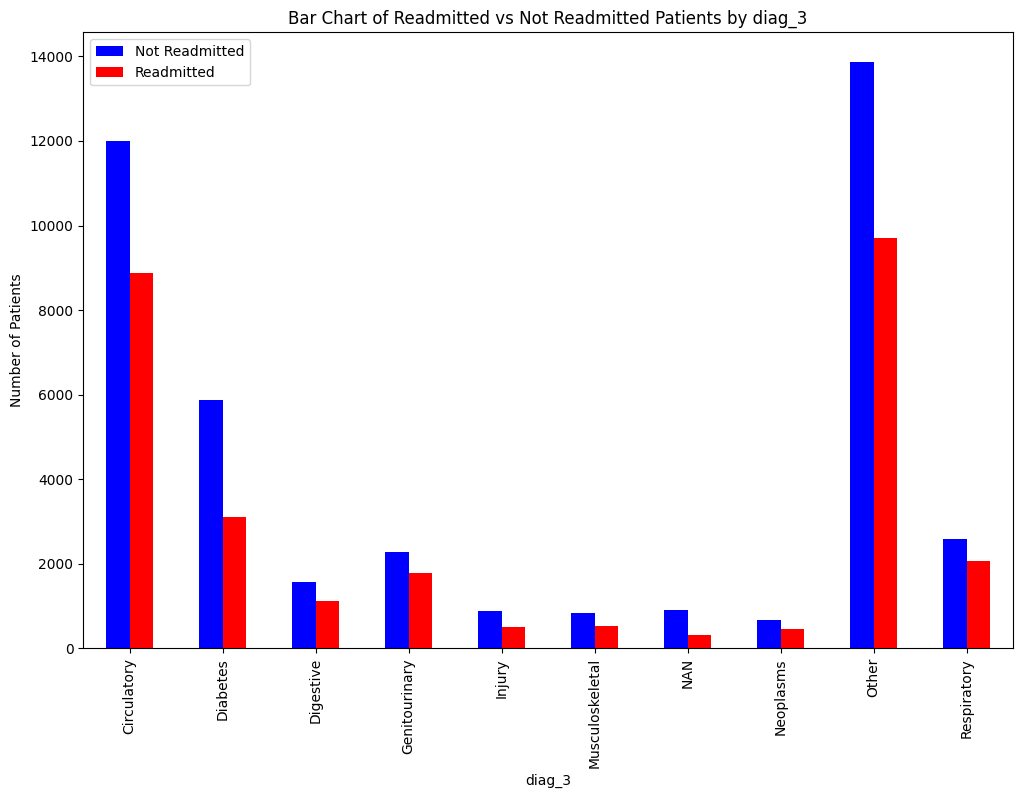

In [35]:
# plot readmission counts vs diagnisis 1
for diag_col in diag_list:
    plot_bar_chart(df, diag_col, diag_col)

## Re-admissions based on Max Glu Serum ##

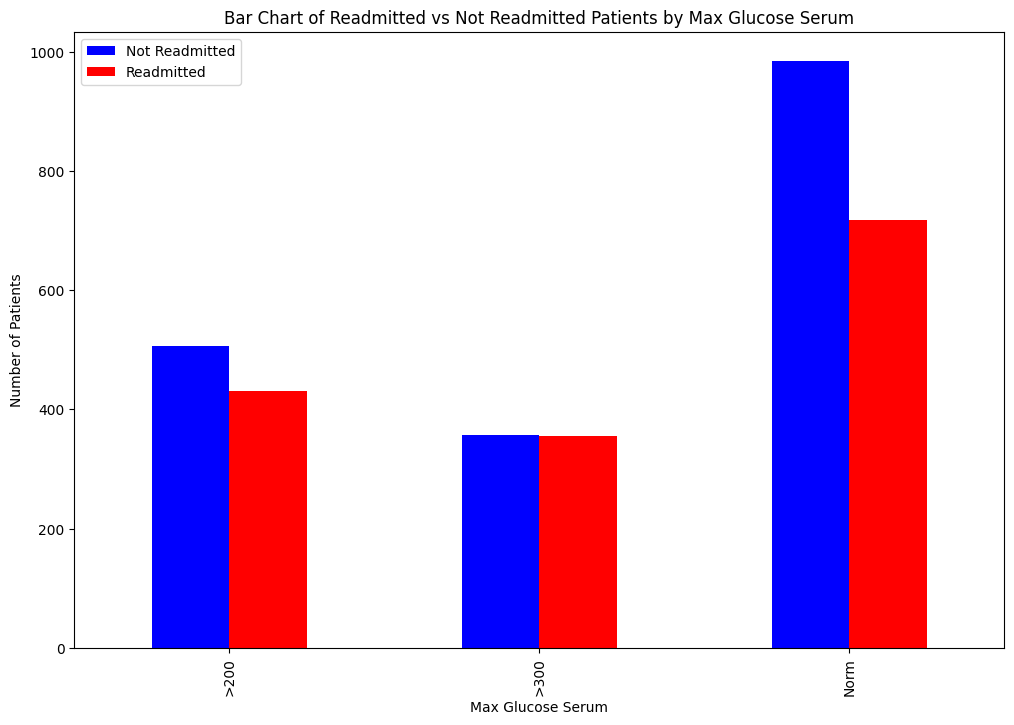

In [36]:
# plot readmissions vs max glucose serum test results
plot_bar_chart(df[pd.notna(df['max_glu_serum'])], 'max_glu_serum', 'Max Glucose Serum')

## Re-admissions based on HbA1C result ##

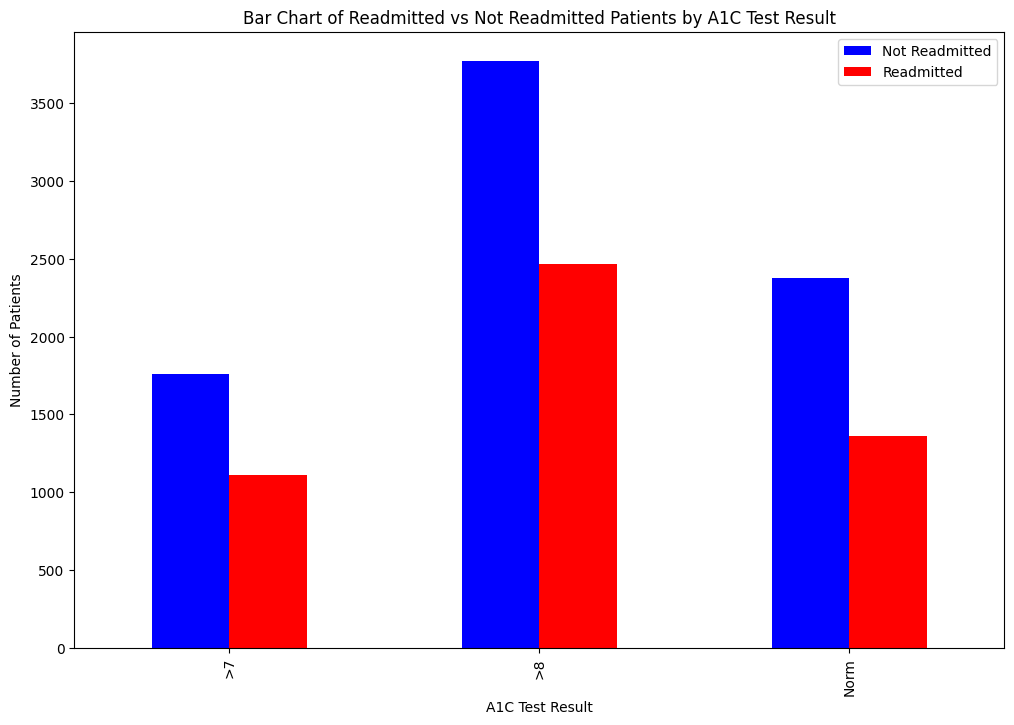

In [37]:
# plot readmissions vs A1C test results
plot_bar_chart(df[pd.notna(df['A1Cresult'])], 'A1Cresult', 'A1C Test Result')

## Re-admissions based on Change ##

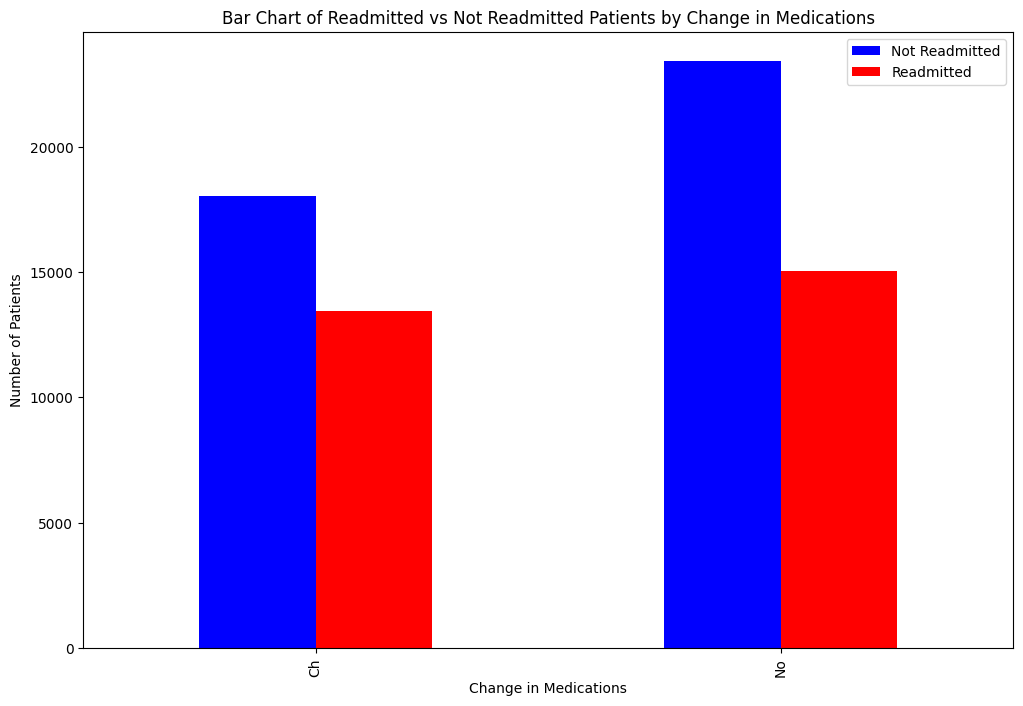

In [38]:
# plot re-admissions vs change in medications
plot_bar_chart(df, 'change', 'Change in Medications')

## Re-admission based on time in hospital ##

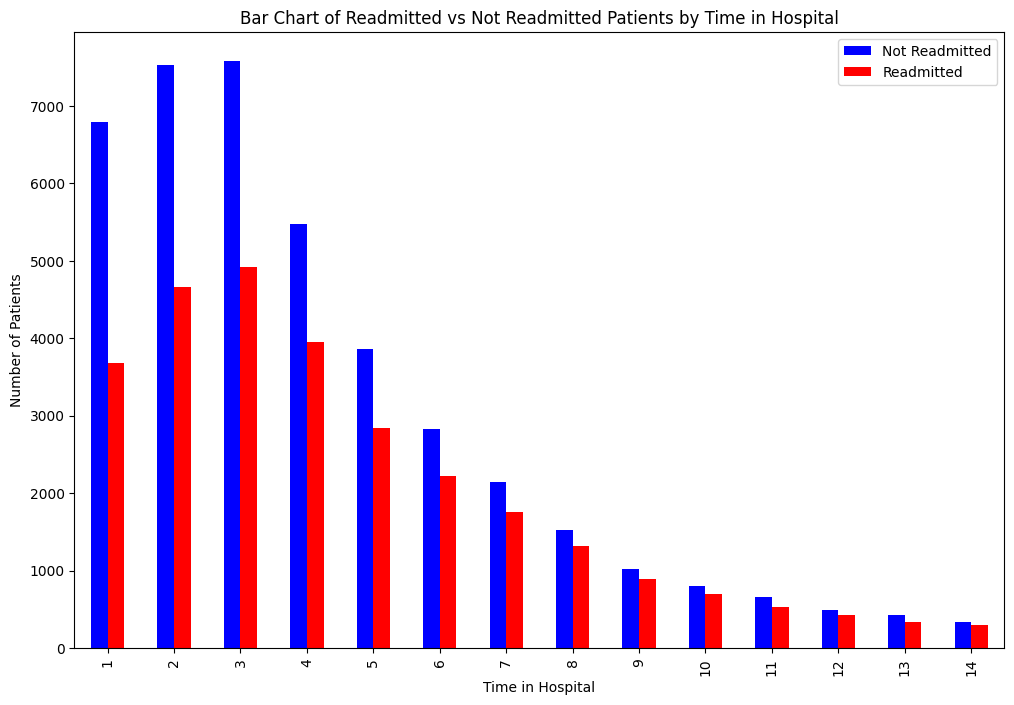

In [39]:
# plot based on re-admissions vs time in hospital
plot_bar_chart(df, 'time_in_hospital', 'Time in Hospital')

## Re-admission based on diabetes medications ##

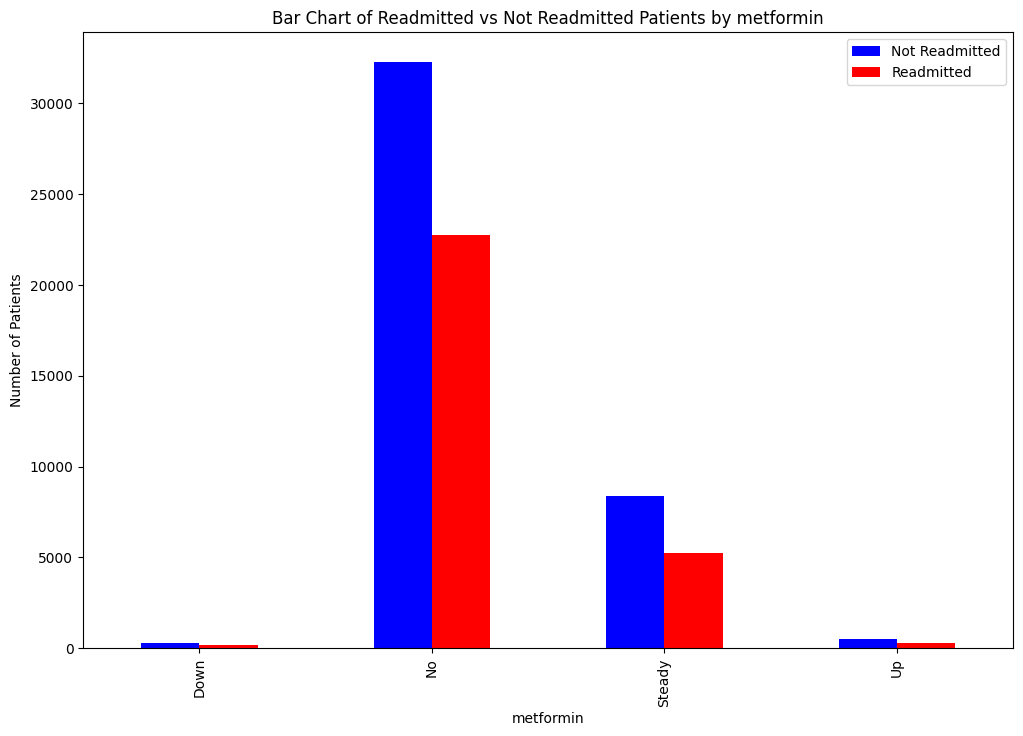

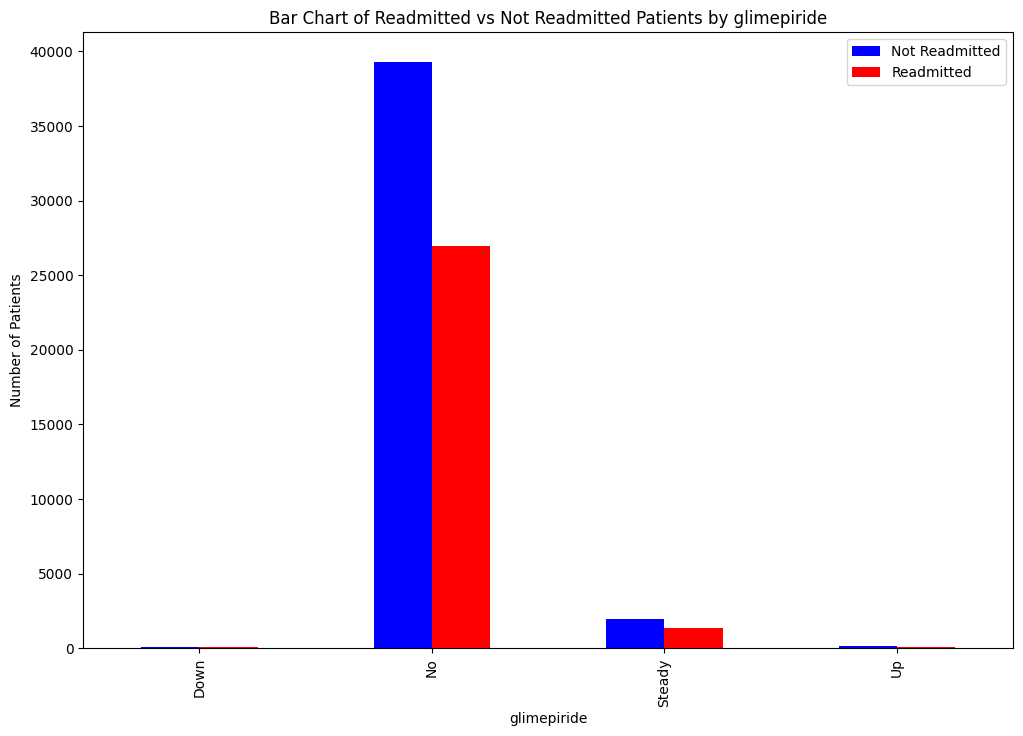

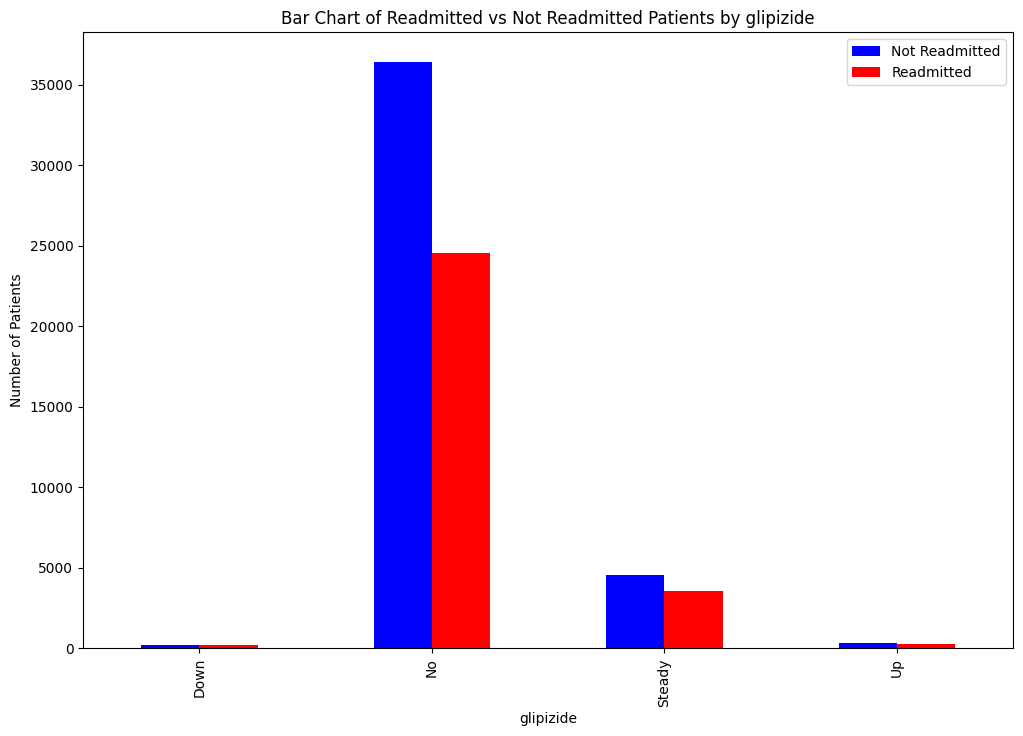

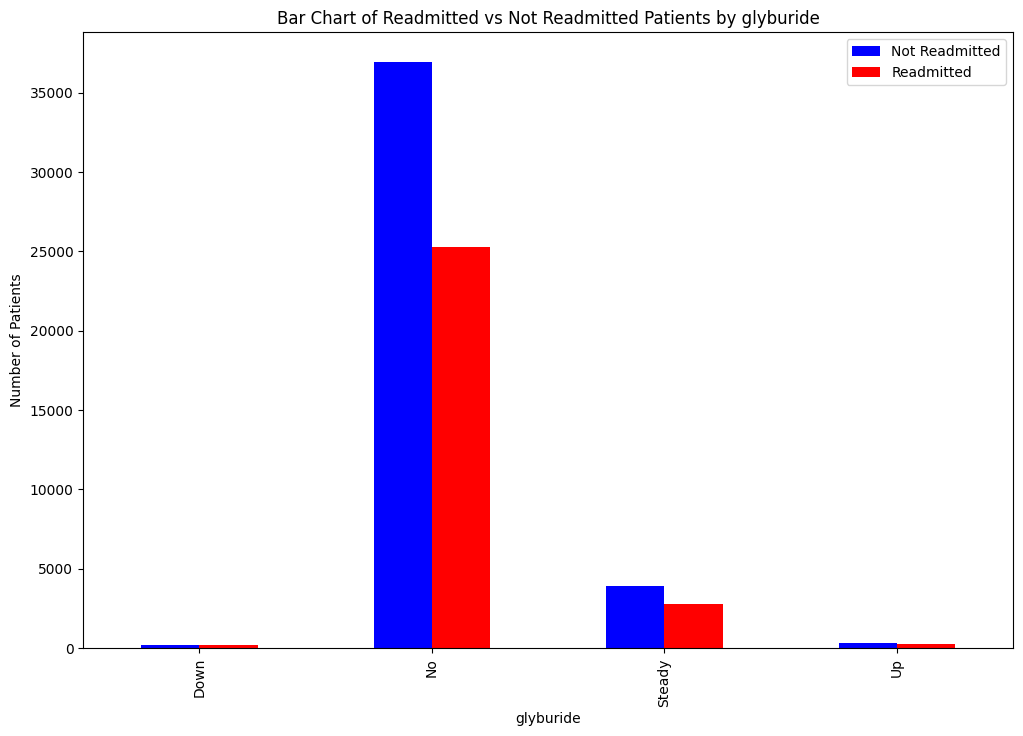

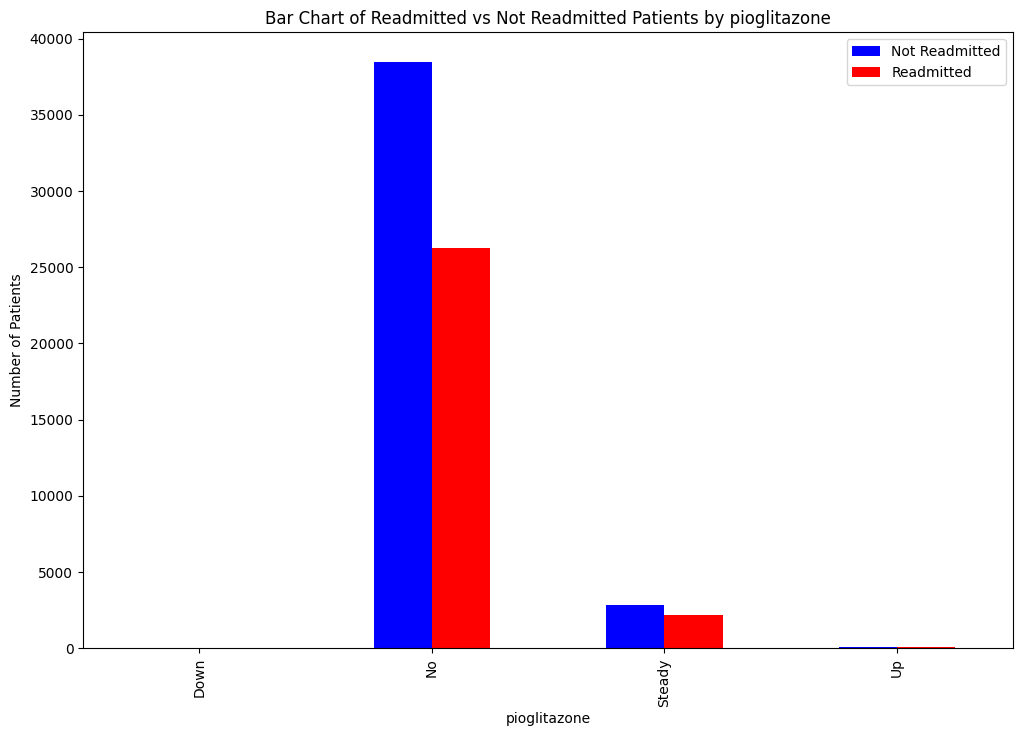

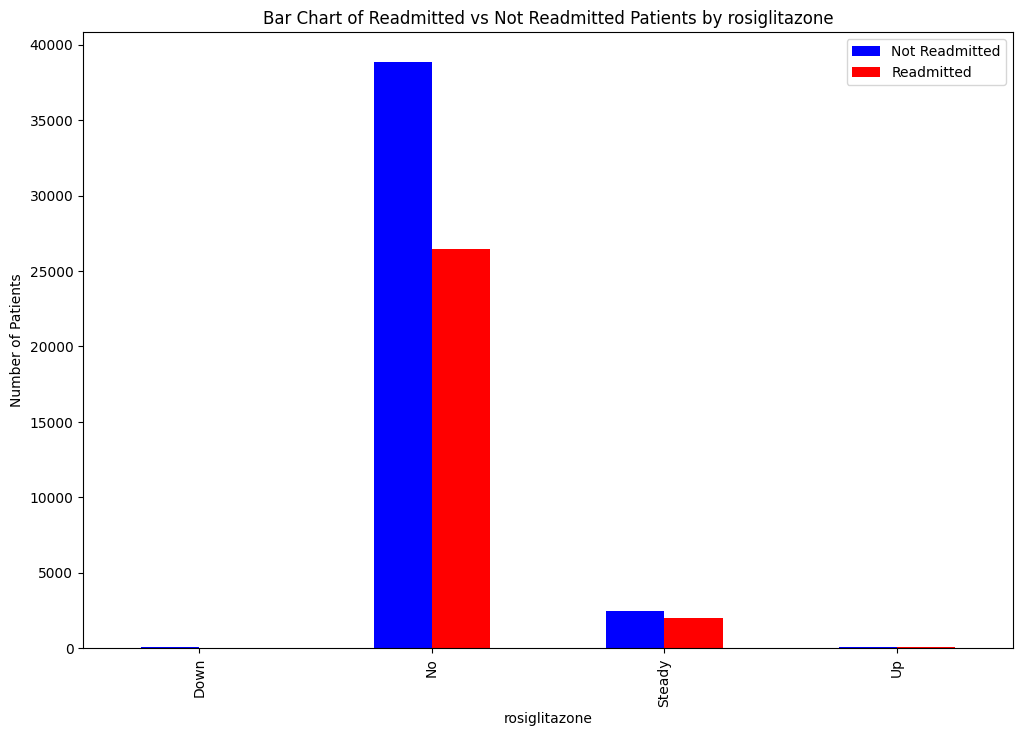

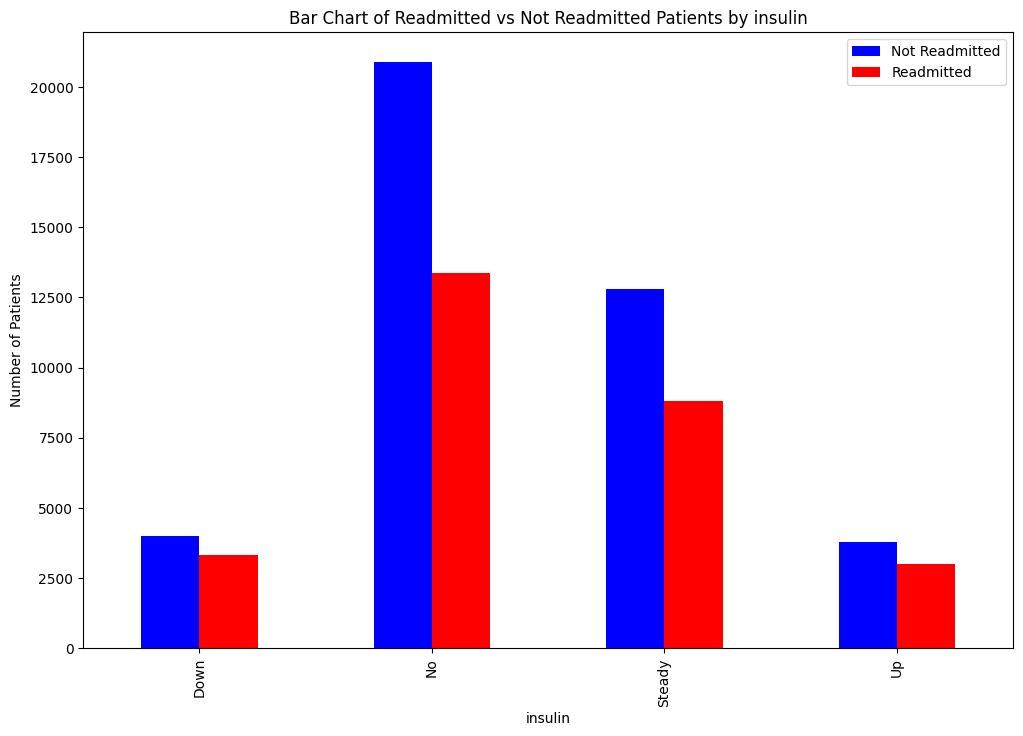

In [40]:
# get the medicine columns that are not dropped
remaining_medicine_columns = [col for col in medicine_columns if col not in medicine_column_to_drop]

for medicine in remaining_medicine_columns:
    plot_bar_chart(df, medicine, medicine)

## Re-admissions based on number of emergency visits ##

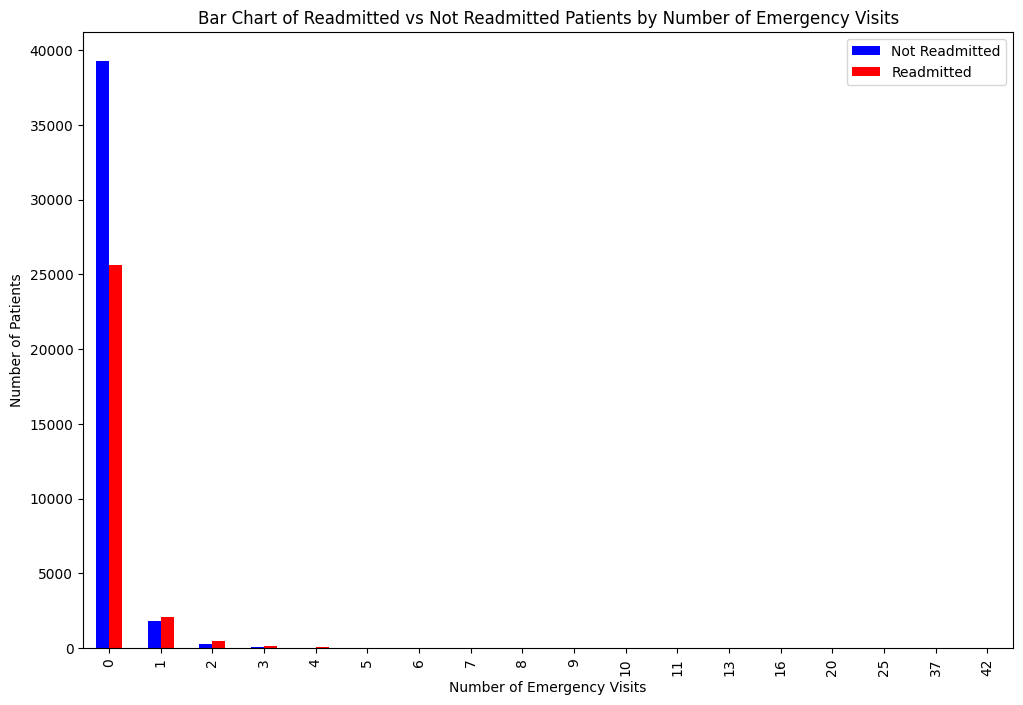

In [41]:
# plot re-admissions vs the number of emergency visits
plot_bar_chart(df, 'number_emergency', 'Number of Emergency Visits')